In [7]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

from neural_astar.planner import NeuralAstar
from neural_astar.utils.data_sdd_intrascenes import create_sdd_dataloader
from neural_astar.utils.training import load_from_ptl_checkpoint





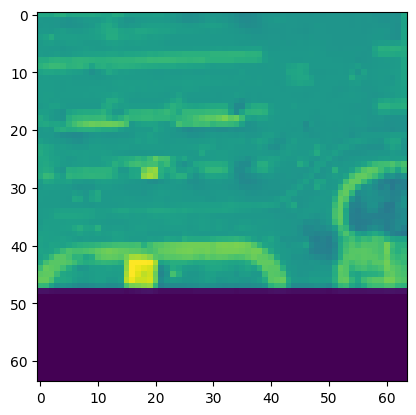

In [8]:
dataloader = create_sdd_dataloader("C:/Users/User/Desktop/uni/Tesi/neural-astar/planning-datasets/data/sdd/s064_0.5_128_300/bookstore/", "video0", 1)
map_designs, start_maps, goal_maps, opt_trajs = next(iter(dataloader))

plt.imshow(map_designs[0][0])

In [9]:

model = NeuralAstar(encoder_input="rgb+", encoder_arch="CNN", encoder_depth=3, learn_obstacles=True, Tmax=1.0, const=10.)
model.load_state_dict(load_from_ptl_checkpoint("../model/lightning_logs/version_2"))


load ../model/lightning_logs/version_2\checkpoints\epoch=19-step=340.ckpt


<All keys matched successfully>

c:\Users\User\Desktop\uni\Tesi\neural-astar\.venv\lib\site-packages\torch\functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\TensorShape.cpp:2895.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


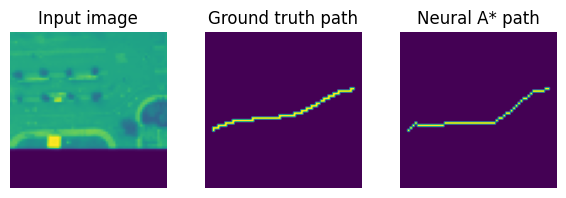

In [10]:
outputs = model(map_designs, start_maps, goal_maps)

t = 0
fig, axes = plt.subplots(1, 3, figsize=[6, 2])
axes[0].imshow(map_designs[t][2])
axes[0].axis("off")
axes[1].imshow(opt_trajs[t, 0])
axes[0].set_title("Input image")
axes[1].axis("off")
axes[1].set_title("Ground truth path")
axes[2].imshow(outputs.paths[t, 0])
axes[2].axis("off")
axes[2].set_title("Neural A* path")
fig.tight_layout()
plt.savefig("../assets/sdd_intra.png")